# CSE688: Practical and Application of Machine Learning - Spring 2021
## Assignment 1

#### Implement a multi-layer neural networks to simulate a function $y = f(x)$ to fit the data given in `HW1-1.csv`. For every input $x$, give an output $y$. The mean-square error between the output and ground truth has to be less than 0.1

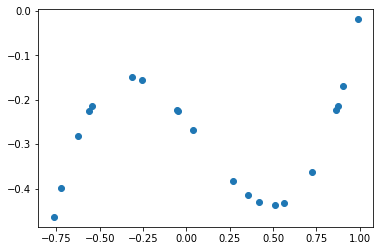

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import csv

# Prepare dataset
X = []
Y = []
with open('HW1-1.csv', newline='') as f:
    reader = csv.DictReader(f)
    for row in reader:
        X.append(float(row['x']))
        Y.append(float(row['y']))
        
plt.scatter(X, Y)

X = np.array(X).reshape(-1, 1)
Y = np.array(Y).reshape(-1, 1)
dataset = tf.data.Dataset.from_tensor_slices((
    tf.cast(X, tf.float32),
    tf.cast(Y, tf.float32)
)).shuffle(100).batch(20)

### It's polynomial!

In [2]:
# Build model
class NN(tf.keras.Model):
    def __init__(self):
        super(NN, self).__init__(name='NN')
        self.fc = [
            tf.keras.layers.Dense(100, activation="tanh", name='layer1'),
            tf.keras.layers.Dense(100, activation="tanh", name='layer2'),
            tf.keras.layers.Dense(1, name='output')
        ]
    def call(self, x):
        for layer in self.fc:
            x = layer(x)
        return x
    def summary(self): # a hack in order to properly output summary
        x = tf.keras.Input(shape=(1), name='input')
        tf.keras.Model(inputs=x, outputs=self.call(x), name='NN').summary()
        
model = NN()
model.summary()

def MSE(y_pred, y_true):
    return tf.reduce_mean((y_pred - y_true)**2)
optimizer = tf.keras.optimizers.Adam()

Model: "NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 1)]               0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               200       
_________________________________________________________________
layer2 (Dense)               (None, 100)               10100     
_________________________________________________________________
output (Dense)               (None, 1)                 101       
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


In [3]:
def train(X, Y):
    with tf.GradientTape() as tape:
        out = model(X)
        loss = MSE(out, Y)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    return loss

In [4]:
for epoch in range(200):
    for X, Y in dataset:
        loss = train(X, Y)
    if epoch%20 == 0:
        print("Loss at epoch {:03d}: {:.3f}".format(epoch, loss))

Loss at epoch 000: 0.093
Loss at epoch 020: 0.019
Loss at epoch 040: 0.014
Loss at epoch 060: 0.014
Loss at epoch 080: 0.014
Loss at epoch 100: 0.013
Loss at epoch 120: 0.013
Loss at epoch 140: 0.011
Loss at epoch 160: 0.009
Loss at epoch 180: 0.006


### Inference

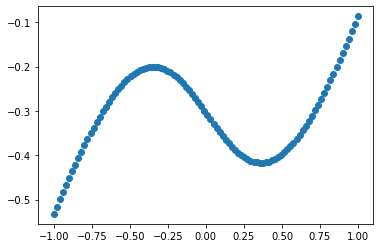

In [5]:
X_test = np.linspace(-1, 1, 100).reshape(-1, 1).astype(np.float32)
out = model(X_test).numpy()  
plt.scatter(X_test.reshape(-1), out.reshape(-1))